## Image colour operations

---
21BAI1056 SHREYA ROSHAN
Machine Vision Lab 1


# Reading a B/W image and displaying it along with the pixel values

In [ ]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the image
path_to_image='/content/download.jfif'
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)

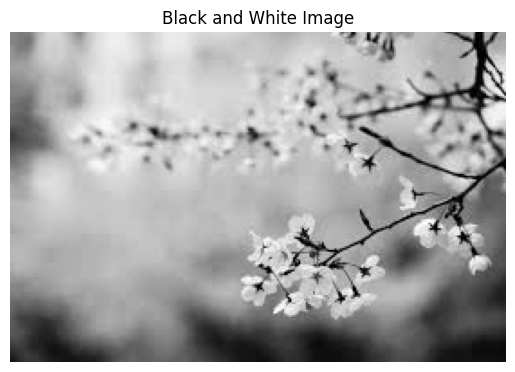

In [ ]:
# Check if the image is read correctly
if image is None:
    print("Error: Could not read image.")
else:
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title('Black and White Image')
    plt.axis('off')  # Hide axis
    plt.show()



In [ ]:
 # Get the unique pixel values and their counts
unique, counts = np.unique(image, return_counts=True)
pixel_values = dict(zip(unique, counts))



In [ ]:
 # Display black and white pixel values
print(f"Black pixel value (0): {pixel_values.get(0, 0)}")
print(f"White pixel value (255): {pixel_values.get(255, 0)}")

Black pixel value (0): 177
White pixel value (255): 10


# Reading a Colour image and displaying it. Segregating the R-G-B Channels and displaying them as well

In [ ]:
# Read the color image
path_to_image='/content/download (1).jfif'
image = cv2.imread(path_to_image)

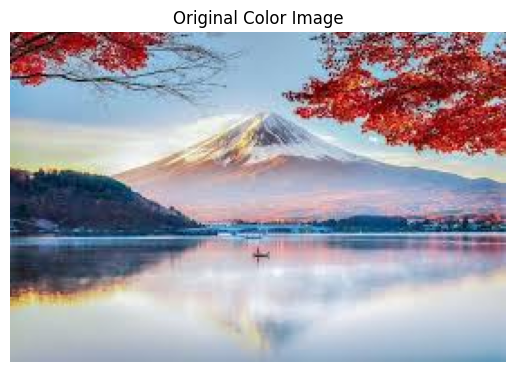

In [ ]:
# Check if the image is read correctly
if image is None:
    print("Error: Could not read image.")
else:
    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original color image
    plt.imshow(image_rgb)
    plt.title('Original Color Image')
    plt.axis('off')  # Hide axis
    plt.show()


In [ ]:
# Split the image into R, G, B channels
b, g, r = cv2.split(image_rgb)


In [ ]:
# Display the R, G, B channels
plt.figure(figsize=(10, 3))

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

(-0.5, 274.5, 182.5, -0.5)

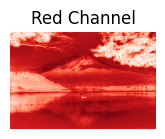

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')  # Hide axis

(-0.5, 274.5, 182.5, -0.5)

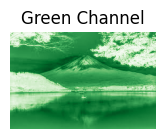

In [ ]:
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')  # Hide axis

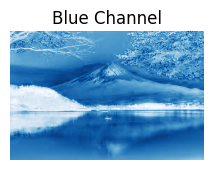

In [ ]:
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

# RGB image to CMY image conversion

To convert an RGB image to a CMY (Cyan, Magenta, Yellow) image using Python with OpenCV and NumPy, you can follow the steps below. The conversion formula from RGB to CMY is:

C=1-𝑅/255
M=1-G/255
Y=1-B/255



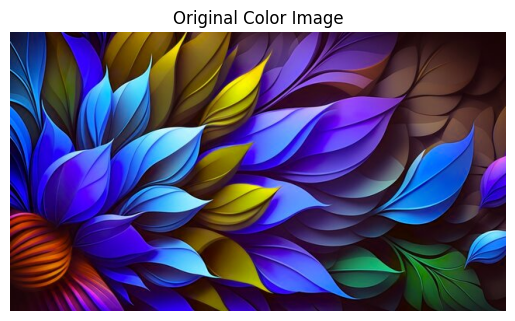

In [ ]:
# Read the color image
path_to_image='/content/360_F_569372470_AS9SXu0tboOLKyuDarJA0g5PWCNM1jAg.jpg'
image = cv2.imread(path_to_image)
# Display the original color image
plt.imshow(image)
plt.title('Original Color Image')
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Normalize the RGB values to [0, 1]
image_rgb_norm = image_rgb / 255.0

In [ ]:
# Convert RGB to CMY
image_cmy = 1 - image_rgb_norm

In [ ]:
# Separate the CMY channels
c, m, y = cv2.split(image_cmy)

In [ ]:
# Display the CMY channels
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

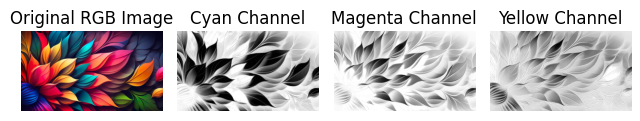

In [ ]:
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.axis('off')  # Hide axis

plt.subplot(1, 4, 2)
plt.imshow(c, cmap='gray')
plt.title('Cyan Channel')
plt.axis('off')  # Hide axis

plt.subplot(1, 4, 3)
plt.imshow(m, cmap='gray')
plt.title('Magenta Channel')
plt.axis('off')  # Hide axis

plt.subplot(1, 4, 4)
plt.imshow(y, cmap='gray')
plt.title('Yellow Channel')
plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

# RGB TO HSI

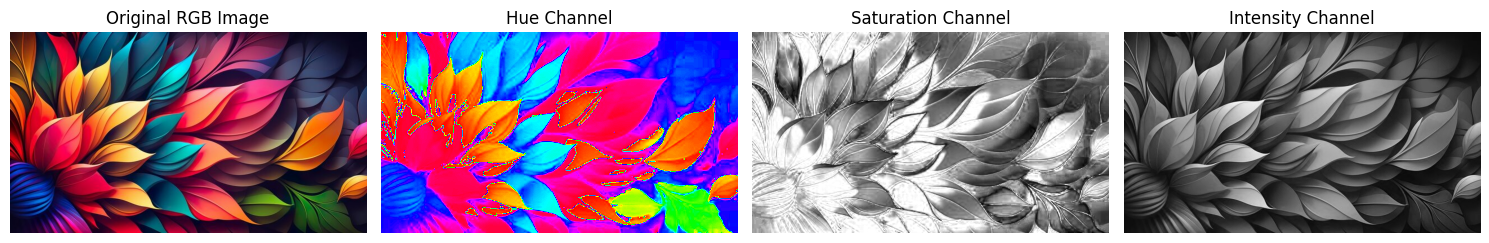

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the color image
image = cv2.imread('/content/360_F_569372470_AS9SXu0tboOLKyuDarJA0g5PWCNM1jAg.jpg')

# Check if the image is read correctly
if image is None:
    print("Error: Could not read image.")
else:
    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize the RGB values to [0, 1]
    image_rgb_norm = image_rgb / 255.0

    # Separate the RGB channels
    R, G, B = cv2.split(image_rgb_norm)

    # Calculate the Intensity
    I = (R + G + B) / 3.0

    # Calculate the Saturation
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-10)) * min_RGB

    # Calculate the Hue
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    theta = np.arccos(numerator / (denominator + 1e-10))

    H = np.copy(theta)
    H[B > G] = 2 * np.pi - H[B > G]

    # Normalize H to the range [0, 1]
    H = H / (2 * np.pi)

    # Stack H, S, and I channels to get the HSI image
    HSI = cv2.merge([H, S, I])

    # Display the HSI channels
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title('Original RGB Image')
    plt.axis('off')  # Hide axis

    plt.subplot(1, 4, 2)
    plt.imshow(H, cmap='hsv')
    plt.title('Hue Channel')
    plt.axis('off')  # Hide axis

    plt.subplot(1, 4, 3)
    plt.imshow(S, cmap='gray')
    plt.title('Saturation Channel')
    plt.axis('off')  # Hide axis

    plt.subplot(1, 4, 4)
    plt.imshow(I, cmap='gray')
    plt.title('Intensity Channel')
    plt.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()


# HSI to RGB

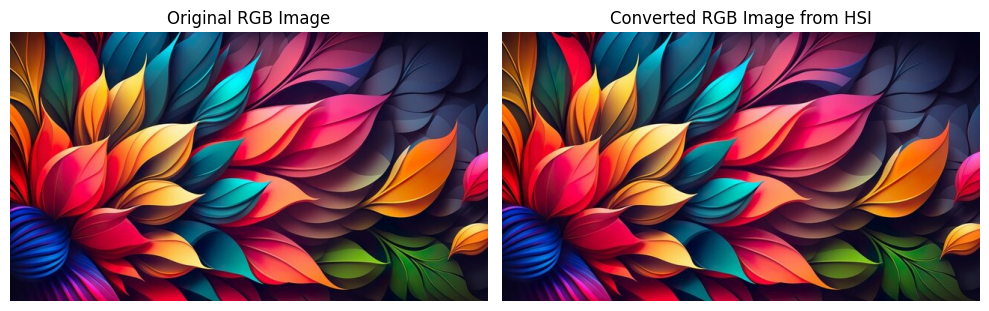

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def HSI_to_RGB(H, S, I):
    R, G, B = np.zeros(H.shape), np.zeros(H.shape), np.zeros(H.shape)
    H = H * 2 * np.pi  # Scale hue to [0, 2π]

    # RG sector (0° ≤ H < 120°)
    idx = (H < 2 * np.pi / 3)
    B[idx] = I[idx] * (1 - S[idx])
    R[idx] = I[idx] * (1 + S[idx] * np.cos(H[idx]) / np.cos(np.pi / 3 - H[idx]))
    G[idx] = 3 * I[idx] - (R[idx] + B[idx])

    # GB sector (120° ≤ H < 240°)
    idx = (H >= 2 * np.pi / 3) & (H < 4 * np.pi / 3)
    H[idx] = H[idx] - 2 * np.pi / 3
    R[idx] = I[idx] * (1 - S[idx])
    G[idx] = I[idx] * (1 + S[idx] * np.cos(H[idx]) / np.cos(np.pi / 3 - H[idx]))
    B[idx] = 3 * I[idx] - (R[idx] + G[idx])

    # BR sector (240° ≤ H < 360°)
    idx = (H >= 4 * np.pi / 3) & (H < 2 * np.pi)
    H[idx] = H[idx] - 4 * np.pi / 3
    G[idx] = I[idx] * (1 - S[idx])
    B[idx] = I[idx] * (1 + S[idx] * np.cos(H[idx]) / np.cos(np.pi / 3 - H[idx]))
    R[idx] = 3 * I[idx] - (G[idx] + B[idx])

    # Clip values to [0, 1] range
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    return np.stack((R, G, B), axis=-1)

# Read the color image
image = cv2.imread('/content/360_F_569372470_AS9SXu0tboOLKyuDarJA0g5PWCNM1jAg.jpg')

# Check if the image is read correctly
if image is None:
    print("Error: Could not read image.")
else:
    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize the RGB values to [0, 1]
    image_rgb_norm = image_rgb / 255.0

    # Convert RGB to HSI (Using previous steps)
    R, G, B = cv2.split(image_rgb_norm)
    I = (R + G + B) / 3.0
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-10)) * min_RGB
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    theta = np.arccos(numerator / (denominator + 1e-10))
    H = np.copy(theta)
    H[B > G] = 2 * np.pi - H[B > G]
    H = H / (2 * np.pi)

    # Convert HSI back to RGB
    rgb_converted = HSI_to_RGB(H, S, I)

    # Display the original and converted images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original RGB Image')
    plt.axis('off')  # Hide axis

    plt.subplot(1, 2, 2)
    plt.imshow(rgb_converted)
    plt.title('Converted RGB Image from HSI')
    plt.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()
